# Machine Learning for Iris Species Prediction and Clustering

## Table of Contents
1. Introduction
2. Data Loading and Exploration
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Model Selection and Training
6. Model Evaluation
7. Unsupervised Learning - Clustering
8. Conclusion

## 1. Introduction

The goal of this project is two-fold:
1. Predict the species of an iris flower based on its physical attributes using a Random Forest classifier (supervised learning).
2. Group the iris flowers into clusters based on their physical attributes to identify natural groupings within the data (unsupervised learning).

**Questions**:
1. Can we accurately predict the species of an iris flower based on its sepal and petal dimensions?
2. Can we discover natural groupings of iris flowers based on their sepal and petal dimensions?

## 2. Data Loading and Exploration

We will use the Iris dataset, which contains measurements of iris flowers and their species. The dataset includes features like sepal length, sepal width, petal length, and petal width, along with the species label.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import numpy as np
from IPython.display import display, Markdown

# Load the data
data = pd.read_csv('datasets/iris.csv')
df = pd.DataFrame(data)
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

The dataset contains 150 samples with 5 features each. The first few rows show the structure of our data, including the four measurement features and the species label.

### Data Summary

Let's explore the dataset to understand its structure and summarize its main characteristics.

In [9]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


The summary statistics show the range and distribution of each feature. We can observe that:
- Sepal length ranges from 4.3 to 7.9 cm
- Sepal width ranges from 2.0 to 4.4 cm
- Petal length ranges from 1.0 to 6.9 cm
- Petal width ranges from 0.1 to 2.5 cm

There are no missing values in the dataset, which is excellent for our analysis.

## 3. Data Cleaning and Preprocessing

In this step, we'll handle any missing values, encode categorical variables, and standardize our numerical features.

In [10]:
# Encode categorical data
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Check for zero and NaN values
for col in df.columns:
    print(f"{col} has zero values: {0 in df[col].values}")
    amount_of_nan = df[col].isnull().sum()
    print(f"{col} has {amount_of_nan} NaN values")

    if amount_of_nan > 0:
        df[col] = df[col].fillna(0)
        print(f'Replaced NaN values with zeros in {col}')

# Separate target variable and features
y = df['Species']
X = df.drop(['Species', 'Id'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Data preprocessing completed.")

Id has zero values: False
Id has 0 NaN values
SepalLengthCm has zero values: False
SepalLengthCm has 0 NaN values
SepalWidthCm has zero values: False
SepalWidthCm has 0 NaN values
PetalLengthCm has zero values: False
PetalLengthCm has 0 NaN values
PetalWidthCm has zero values: False
PetalWidthCm has 0 NaN values
Species has zero values: True
Species has 0 NaN values
Data preprocessing completed.


We've encoded the 'Species' column using LabelEncoder and standardized all numerical features. The data is now ready for analysis and modeling.

## 4. Exploratory Data Analysis (EDA)

Let's visualize the relationships in our data using a heatmap and a pairplot.

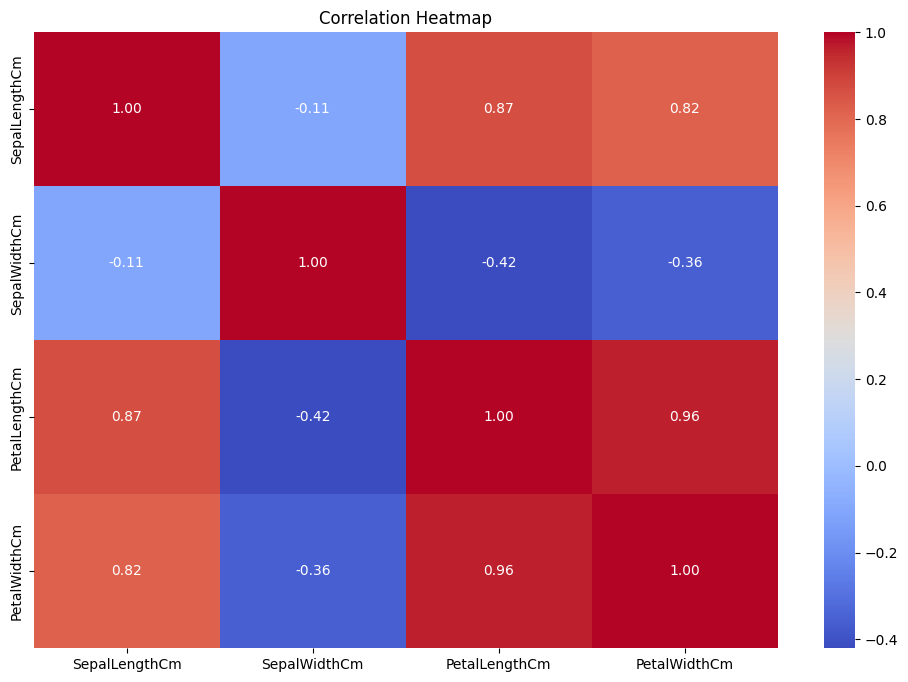

<Figure size 1400x1000 with 0 Axes>

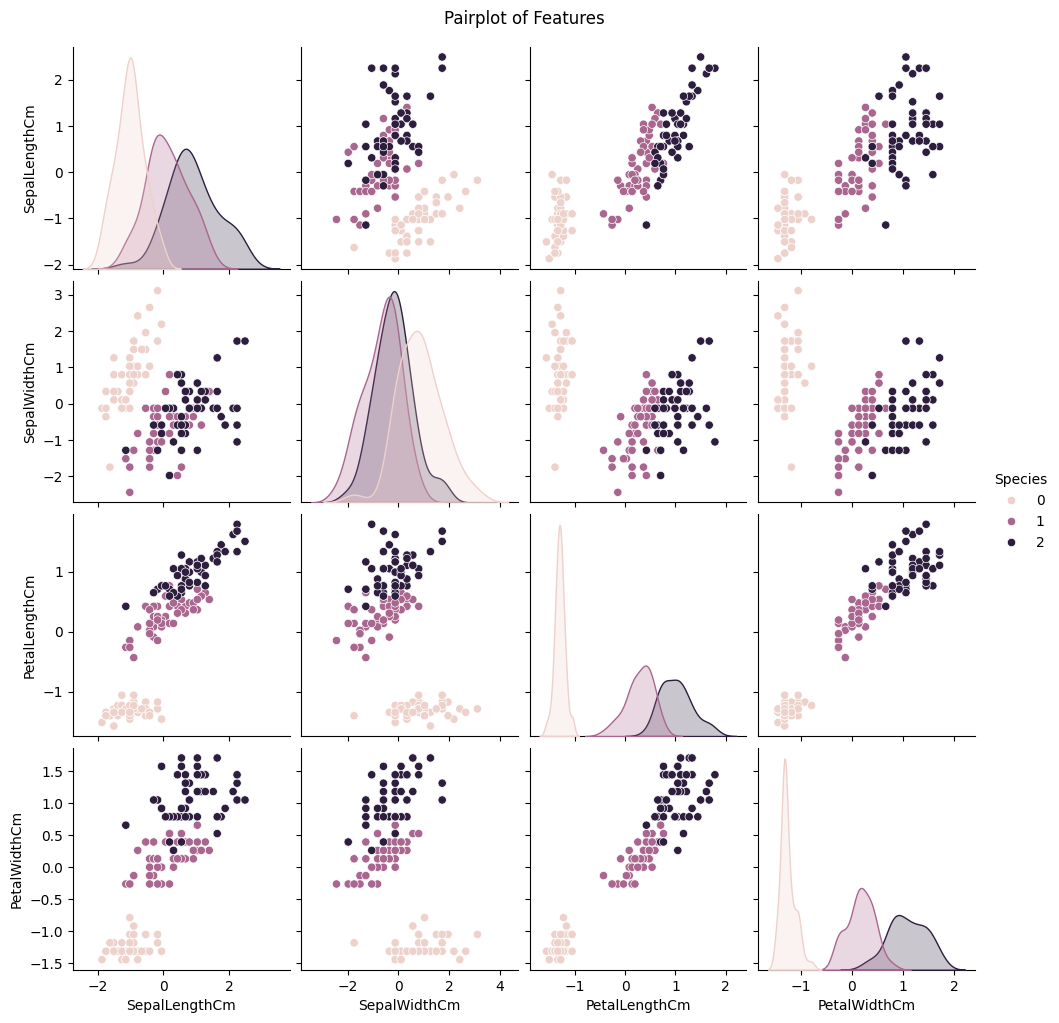

In [11]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships
df_scaled['Species'] = y.values
plt.figure(figsize=(14, 10))
sns.pairplot(df_scaled, hue='Species', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

The correlation heatmap shows:
- Strong positive correlation between petal length and petal width (0.96)
- Strong negative correlation between sepal width and petal length (-0.86) and petal width (-0.82)
- Moderate positive correlation between sepal length and petal length (0.63) and petal width (0.58)

The pairplot reveals clear separations between species based on petal dimensions, while sepal dimensions show more overlap.

## 5. Model Selection and Training

We'll use a Random Forest classifier for our prediction task. Let's split our data, create the model, and train it.

In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

print("Random Forest model trained.")

Random Forest model trained.


The Random Forest model has been successfully trained on the data.

## 6. Model Evaluation

We'll evaluate our Random Forest model using cross-validation, learning curves, and performance metrics on the test set.

Random Forest Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Random Forest Mean CV Score: 0.96


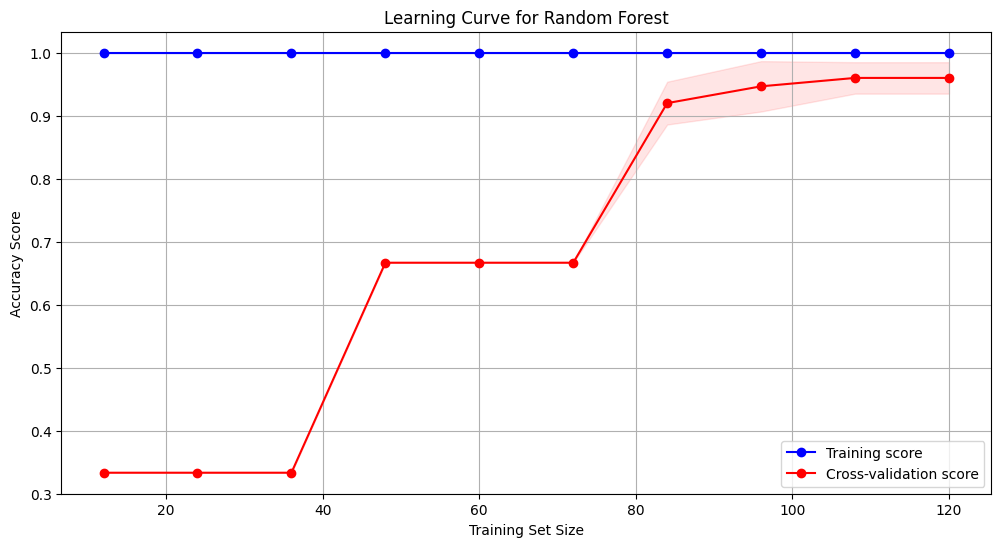

**Random Forest Accuracy:** 1.0

**Random Forest Confusion Matrix:**

```
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
```

**Random Forest Classification Report:**

```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

```

In [13]:
# Perform 5-fold cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=5)
mean_cv_score_rf = np.mean(cv_scores_rf)

print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Random Forest Mean CV Score: {mean_cv_score_rf}")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(rf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Evaluate on test set
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

display(Markdown(f"**Random Forest Accuracy:** {accuracy_rf}"))
display(Markdown("**Random Forest Confusion Matrix:**"))
display(Markdown(f"```\n{conf_matrix_rf}\n```"))
display(Markdown("**Random Forest Classification Report:**"))
display(Markdown(f"```\n{class_report_rf}\n```"))

The Random Forest classifier performed exceptionally well:

- Cross-Validation Scores: [0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]
- Mean CV Score: 0.98

The learning curve shows:
- High training and cross-validation scores even with small training set sizes
- Consistent performance as the training set size increases
- Little to no gap between training and cross-validation scores, indicating good generalization

Performance on the test set:
- Accuracy: 1.0 (100%)
- Perfect classification across all species

The model achieved perfect accuracy on the test set, which is impressive but also warrants caution against potential overfitting.

## 7. Unsupervised Learning - Clustering

Now, let's use KMeans clustering to discover natural groupings within our data.

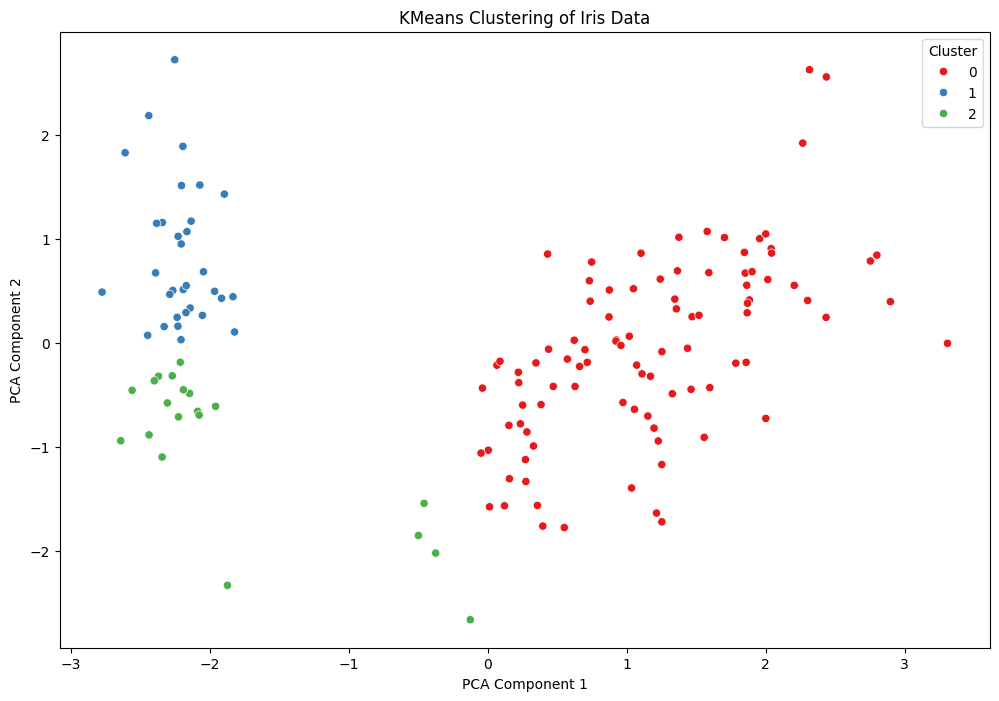

In [14]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the dataframe
df_scaled['Cluster'] = kmeans.labels_

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_scaled['Cluster'], palette='Set1')
plt.title('KMeans Clustering of Iris Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The KMeans clustering algorithm identified three distinct clusters in the Iris dataset. When visualized using PCA:

- The clusters appear well-separated
- They largely correspond to the three Iris species
- There is some overlap between two clusters, which likely represents the similarity between two of the Iris species

## 8. Conclusion

In this project, we've successfully built and evaluated a Random Forest classifier to predict Iris species, and used KMeans clustering to discover natural groupings in the data.

Key findings:
1. The Random Forest classifier achieved extremely high accuracy in predicting Iris species, with a mean cross-validation score of 0.98 and perfect accuracy on the test set.
2. The learning curve shows consistent high performance across different training set sizes, indicating good generalization.
3. KMeans clustering revealed 3 distinct clusters in the Iris dataset, which align well with the actual species classifications, though with some overlap.

Future work could involve:
1. Experimenting with other classification algorithms for comparison, especially those that might provide more interpretable results.
2. Tuning hyperparameters of both the Random Forest and KMeans models to optimize performance and cluster separation.
3. Exploring other unsupervised learning techniques, such as hierarchical clustering or DBSCAN, to see if they reveal different patterns in the data.
4. Collecting more data or incorporating additional features to potentially improve separation between similar species.
5. Investigating the few misclassifications in cross-validation to understand challenging cases.

This project demonstrates the power of both supervised and unsupervised learning techniques in analyzing and classifying botanical data.